<a href="https://colab.research.google.com/github/santiagonajera/CAINCO-13-Mayo2025/blob/main/ExpoCainco_13Mayo2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pandas matplotlib prophet openpyxl

Datos cargados:
       Fecha  Item_1  Item_2  Item_3  Item_4  Item_5  Item_6  Item_7  Item_8  \
0 2021-01-04     148     156     126      54     146      48      81     117   
1 2021-01-11     161     157     149      51     132      47      74     137   
2 2021-01-18     163     175     141      69     138      67     100     122   
3 2021-01-25     174     168     150      74     135      73      84     127   
4 2021-02-01     154     155     146      66     124      62      83     139   

   Item_9  ...  Item_16  Item_17  Item_18  Item_19  Item_20  Item_21  Item_22  \
0     205  ...      141       73      196      199      181      112       47   
1     196  ...      151      106      206      105      178      112       62   
2     148  ...      142       86      188      114      191      122       43   
3     189  ...      155       99      202       88      187      141       55   
4     216  ...      177       95      210      121      202      138       69   

   Item_23  Item

DEBUG:cmdstanpy:input tempfile: /tmp/tmpz_d4xckz/_w0czbu0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpz_d4xckz/clbxmxpe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5668', 'data', 'file=/tmp/tmpz_d4xckz/_w0czbu0.json', 'init=/tmp/tmpz_d4xckz/clbxmxpe.json', 'output', 'file=/tmp/tmpz_d4xckz/prophet_modelq5gcw2cc/prophet_model-20250509224852.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:48:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:48:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


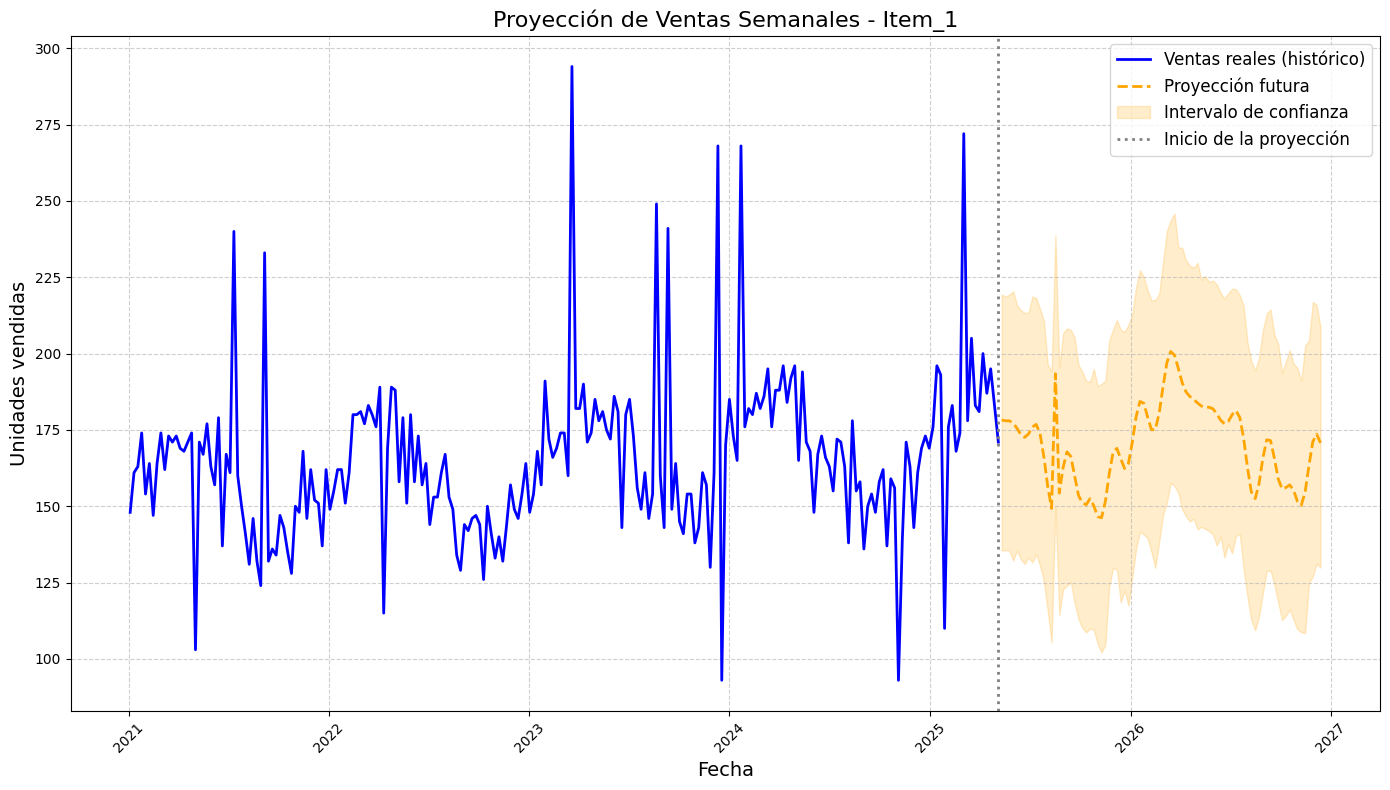

In [3]:
# Importar las librerías necesarias
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Descargar el archivo desde GitHub
url = "https://github.com/santiagonajera/CAINCO-13-Mayo2025/raw/refs/heads/main/ventas_items_cainco.xlsx "

# Leer el archivo Excel
df_excel = pd.read_excel(url)

# Mostrar las primeras filas del DataFrame para verificar
print("Datos cargados:")
print(df_excel.head())

# Seleccionar solo la columna Fecha e Item_1
df = df_excel[['Fecha', 'Item_1']].rename(columns={'Fecha': 'ds', 'Item_1': 'y'})

# Eliminar filas vacías (si existen)
df.dropna(inplace=True)

# Asegurarse de que 'ds' sea tipo datetime
df['ds'] = pd.to_datetime(df['ds'])

# Verificar el formato final del DataFrame
print("\nDatos preparados para Prophet:")
print(df.head())

# Instanciar y configurar el modelo Prophet
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    interval_width=0.95  # 95% de intervalo de confianza
)

# Añadir componentes estacionales adicionales si es necesario
model.add_country_holidays(country_name='Argentina')  # Opcional: festivos si afectan ventas

# Entrenar el modelo
model.fit(df)

# Crear un DataFrame para hacer predicciones futuras (12 semanas)
future = model.make_future_dataframe(periods=12 * 7, freq='W')  # 12 semanas x 7 días

# Realizar la predicción
forecast = model.predict(future)

# Graficar los resultados
fig, ax = plt.subplots(figsize=(14, 8))

# Graficar valores históricos
ax.plot(df['ds'], df['y'], label='Ventas reales (histórico)', color='blue', linewidth=2)

# Graficar predicción futura
forecast_last = forecast[forecast['ds'] > df['ds'].max()]
ax.plot(forecast_last['ds'], forecast_last['yhat'], label='Proyección futura', color='orange', linestyle='--', linewidth=2)

# Rellenar el intervalo de confianza
ax.fill_between(
    forecast_last['ds'],
    forecast_last['yhat_lower'],
    forecast_last['yhat_upper'],
    color='orange',
    alpha=0.2,
    label='Intervalo de confianza'
)

# Marcar el punto de corte entre histórico y futuro
cutoff_date = df['ds'].max()
ax.axvline(x=cutoff_date, color='gray', linestyle=':', linewidth=2, label='Inicio de la proyección')

# Personalización del gráfico
ax.set_title('Proyección de Ventas Semanales - Item_1', fontsize=16)
ax.set_xlabel('Fecha', fontsize=14)
ax.set_ylabel('Unidades vendidas', fontsize=14)
ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar gráfico
plt.show()